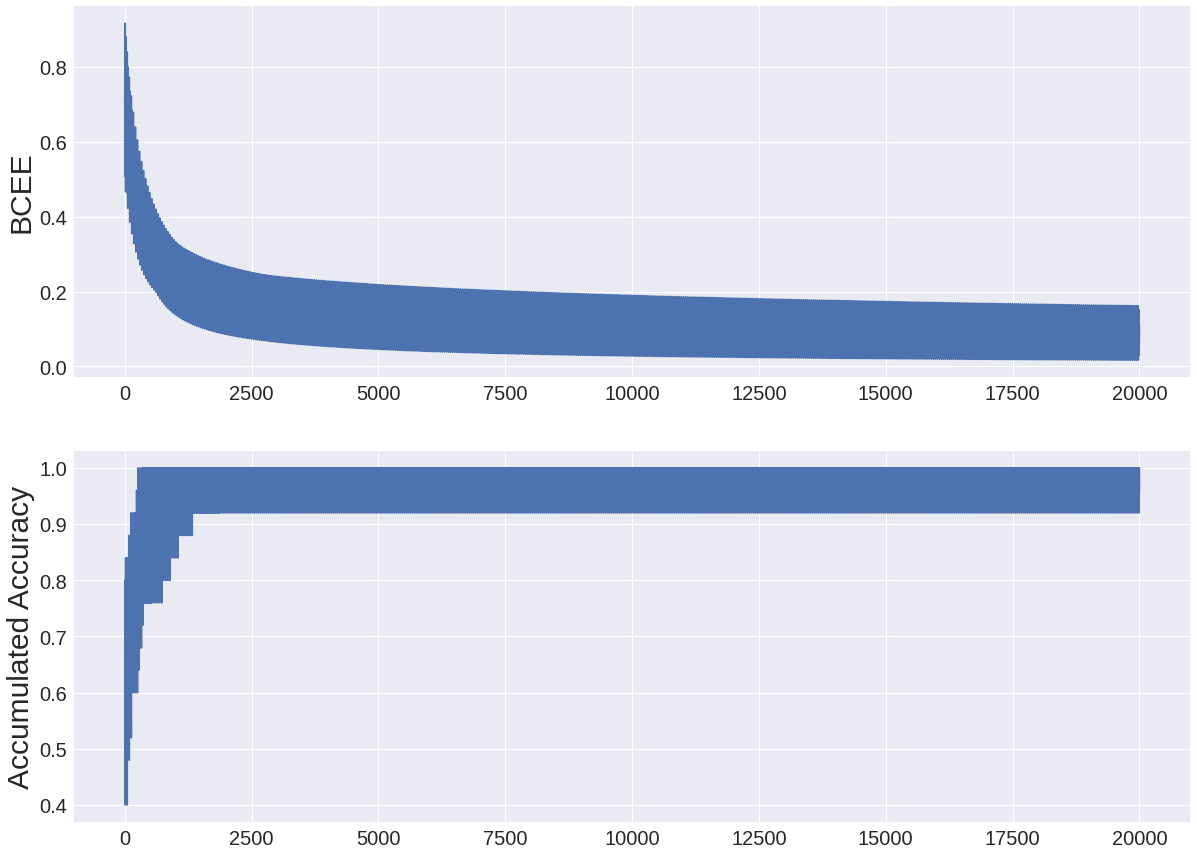

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
np.random.seed(1)
plt.style.use('seaborn')

# set params
N, n_feature = 1000,3
lr = 0.01
t_w = np.random.uniform(-1,1,n_feature).reshape(-1,1)
t_b = np.random.uniform(-1,1,1)
w = np.random.uniform(-1,1,n_feature).reshape(-1,1)
b = np.random.uniform(-1,1,1).reshape(1,1) 
epochs = 500
b_size = 25

n_batch = N//25

# generate dataset
X_data = np.random.normal(0,1,(N,n_feature))
Y_data = X_data@t_w + t_b
Y_data = (Y_data>0).astype(np.int) # 확률(0,1)로 표시하기 위해서 Binary

# training
J_track = list()
acc_track = list()

for epoch in range(epochs):
  # get minibatches
  for b_idx in range(n_batch):
    X = X_data[b_idx*b_size : (b_idx+1)*b_size, ...]
    Y = Y_data[b_idx*b_size : (b_idx+1)*b_size, ...]
    #forward propagation
    Z = X @ w + b
    Pred = 1/(1+np.exp(-Z))
    J0 = -(Y*np.log(Pred)+(1-Y)*np.log(1-Pred))
    J = np.mean(J0) # 평균값
    J_track.append(J)

    # calculate accuracy
    Pred_ = (Pred > 0.5).astype(np.int)
    n_correct = (Pred_ == Y).astype(np.int) # 정답인지 아닌지 체크
    acc = np.sum(n_correct)/b_size # 정답 맞추는 것의 평균
    acc_track.append(acc)

    #jacobians
    dJ_dJ0 = (1/b_size) * np.ones((1,b_size))
    dJ0_dPred = np.diag(((Pred-Y)/(Pred*(1-Pred))).flatten())
    dPred_dZ = np.diag((Pred*(1-Pred)).flatten())
    dZ_dw = X
    dZ_db = np.ones((b_size,1)) # dataset 이기 때문에 bias가 vector로 나온다.

    # backpropagation
    dJ_dPred = dJ_dJ0 @ dJ0_dPred
    dJ_dZ =  dJ_dPred @ dPred_dZ
    dJ_dw = dJ_dZ@dZ_dw
    dJ_db = dJ_dZ@dZ_db

    # parameter update
    w = w-lr*dJ_dw.T
    b = b-lr*dJ_db

# visualize results
fig, axes = plt.subplots(2,1,figsize=(20,15))
axes[0].plot(J_track)
axes[0].set_ylabel('BCEE',fontsize=30)
axes[0].tick_params(labelsize=20)

axes[1].plot(acc_track)
axes[1].set_ylabel('Accumulated Accuracy',fontsize=30)
axes[1].tick_params(labelsize=20)
# 결과를 보면 loss는 줄어들고 , acc는 1에 가까워지는 즉, 증가함을 확인 할 수 있다.